In [13]:
import numpy as np
import torch
from torch import nn
import pandas as pd
import re

# SLIDE (1) TF-IDF

На вход дается список строк (документов). Необходимо перевести предложения в tf-idf вектора.

Перевод осуществляется по формулам:

* Частота слова (term frequency) в документе $d$:

$$tf(word, d) = \frac{n_{word}}{\sum_{i}^{words}n_i}$$

* Обратная частота документа (inverse document frequency) - частота документов с таким словом

$$idf(word, D) = log\Big(\frac{|D|}{|\{word \in d | d\in D\}|}\Big)$$

* Итоговое значение фичи вектора для слова:

$$ feature_i =  tf(word, d) \times idf(word, D) $$

На выход нужно вернуть массивы $tf$, $idf$, и $tf-idf$. Массивы отсортированы в прямом алфавитном порядке слов. Смотрите тесты для пояснений.

P.S. Значение не совпадает с реальным значением из TfidfVectorizer, так как там используется [сглаженная формула](https://ru.wikipedia.org/wiki/Okapi_BM25) и нормировка.

# TASK

In [ ]:
def tf_idf(list_of_strings: list) -> tuple :
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    return tf, idf, tf_idf

# TESTs

In [4]:
X = ['I I enjoy flying',
     'I like like trains ',
     'I like taxi']

order = ['I', 'enjoy', 'flying', 'like', 'taxi', 'trains']

tf_r = np.array([[0.5 , 0.25, 0.25, 0.  , 0.  , 0.  ],
                 [0.25, 0.  , 0.  , 0.5 , 0.  , 0.25],
                 [0.333, 0.  , 0.  , 0.333, 0.333, 0.  ]])

idf_r = [0., 1.0986, 1.0986, 0.4054, 1.0986, 1.0986]

tfidf_r = np.array([[0., 0.2746, 0.2746, 0.   , 0.     , 0.    ],
                    [0., 0.    , 0.   , 0.2027, 0.     , 0.2746],
                    [0., 0.    , 0.   , 0.1351, 0.3662 , 0.    ]])

tf, idf, tfidf = tf_idf(X)

assert np.allclose( tf,  tf_r, atol=1e-2)
assert np.allclose(idf, idf_r, atol=1e-3)
assert np.allclose(tfidf, tfidf_r, atol=1e-2)


#################################################################################

X = ['я недели две хочу пицца',
     'но вся пицца не пицца которую я хочу',
     'сделать самой идея хорошая',
     'но я не знаю которую пицца я хочу']

order = ['вся', 'две', 'знаю', 'идея', 'которую', 'не', 'недели', 
         'но', 'пицца', 'самой', 'сделать', 'хорошая', 'хочу', 'я']

tf_r = np.array([[0.   , 0.2  , 0.   , 0.   , 0.   , 0.   , 0.2  , 0.   , 0.2  ,
        0.   , 0.   , 0.   , 0.2  , 0.2  ],
       [0.125, 0.   , 0.   , 0.   , 0.125, 0.125, 0.   , 0.125, 0.25 ,
        0.   , 0.   , 0.   , 0.125, 0.125],
       [0.   , 0.   , 0.   , 0.25 , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.25 , 0.25 , 0.25 , 0.   , 0.   ],
       [0.   , 0.   , 0.125, 0.   , 0.125, 0.125, 0.   , 0.125, 0.125,
        0.   , 0.   , 0.   , 0.125, 0.25 ]])

idf_r = np.array([1.38629436, 1.38629436, 1.38629436, 1.38629436, 0.69314718,
                  0.69314718, 1.38629436, 0.69314718, 0.28768207, 1.38629436,
                  1.38629436, 1.38629436, 0.28768207, 0.28768207])

tfidf_r = np.array([[0.        , 0.27725887, 0.        , 0.        , 0.        ,
                     0.        , 0.27725887, 0.        , 0.05753641, 0.        ,
                     0.        , 0.        , 0.05753641, 0.05753641],
                    [0.1732868 , 0.        , 0.        , 0.        , 0.0866434 ,
                     0.0866434 , 0.        , 0.0866434 , 0.07192052, 0.        ,
                     0.        , 0.        , 0.03596026, 0.03596026],
                    [0.        , 0.        , 0.        , 0.34657359, 0.        ,
                     0.        , 0.        , 0.        , 0.        , 0.34657359,
                     0.34657359, 0.34657359, 0.        , 0.        ],
                    [0.        , 0.        , 0.1732868 , 0.        , 0.0866434 ,
                     0.0866434 , 0.        , 0.0866434 , 0.03596026, 0.        ,
                     0.        , 0.        , 0.03596026, 0.07192052]])

tf, idf, tfidf = tf_idf(X)
assert np.allclose( tf,  tf_r, atol=1e-2)
assert np.allclose(idf, idf_r, atol=1e-3)
assert np.allclose(tfidf, tfidf_r, atol=1e-2)

# SLIDE (1) Co-occurrence

Дано несколько предложений на русском или английском языке. 

Необходимо сделать co-occurrence таблицу слов, стоящих рядом в окне длины `window_size`.

См. тесты для примера. Форматировать/изменять предложения не нужно.

# TASK

In [ ]:
def content_embeddings(list_of_strings: list, window_size:int)-> np.ndarray:
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [8]:
X = ['I enjoy flying',
     'I like trains ',
     'I like taxi']

coocc = pd.DataFrame(
             index   = ['I', 'enjoy', 'flying', 'like', 'taxi', 'trains'],
             columns = ['I', 'enjoy', 'flying', 'like', 'taxi', 'trains'],
             data = np.array([[0, 1, 0, 2, 0, 0],
                              [1, 0, 1, 0, 0, 0],
                              [0, 1, 0, 0, 0, 0],
                              [2, 0, 0, 0, 1, 1],
                              [0, 0, 0, 1, 0, 0],
                              [0, 0, 0, 1, 0, 0]]))

assert coocc.equals(content_embeddings(X, 3))

#################################################################3

SF = ['сегодня мой сосед опять сверлит стены', 
      'сегодня мой сосед опять сверлит стены',
      'сегодня мой сосед опять сверлит стены',
      'сегодня мой сосед опять сверлит стены',
      'сегодня мой сосед опять сверлит стены']

coocc = pd.DataFrame(
             index   = ['мой', 'опять', 'сверлит', 'сегодня', 'сосед', 'стены'],
             columns = ['мой', 'опять', 'сверлит', 'сегодня', 'сосед', 'стены'],
             data = np.array([[0, 5, 0, 5, 5, 0],
                              [5, 0, 5, 0, 5, 5],
                              [0, 5, 0, 0, 5, 5],
                              [5, 0, 0, 0, 5, 0],
                              [5, 5, 5, 5, 0, 0],
                              [0, 5, 5, 0, 0, 0]]))

assert coocc.equals(content_embeddings(SF, 5))

##################################################################

Z = ['есть курс на 6 зет который успеть проставить',
     'есть таблица чтобы зет проставить',
     'сколько дней чтобы проставить зет с хвостовка',
     'есть 6 невыставленных зет с этого курс']

words = ['6', 'дней', 'есть', 'зет', 'который', 'курс', 'на', 'невыставленных', 'проставить', 
                        'с', 'сколько', 'таблица', 'успеть', 'хвостовка', 'чтобы', 'этого']

coocc = pd.DataFrame(
             index   = words,
             columns = words,
             data = np.array([[0, 0, 2, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0],
                              [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
                              [2, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0],
                              [2, 1, 2, 0, 1, 2, 1, 1, 3, 2, 0, 1, 1, 1, 2, 1],
                              [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
                              [1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
                              [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                              [1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
                              [0, 1, 0, 3, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0],
                              [1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1],
                              [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
                              [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
                              [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                              [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
                              [0, 1, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0],
                              [0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]]))

assert coocc.equals(content_embeddings(Z, 7))

# SLIDE (1) Директор Дамблдор

Надеюсь вы все читали [Гарри Поттер и методы рационального мышления](https://disk.yandex.ru/d/2MFZgIo53yhWUg). Если нет, то немедленно это сделайте. Но сперва обучите Word2Vec, чтобы он понял, что `Дамблдор` - это директор Хогвартса.

На вход подается неотформатированная строка из файла `methods_of_rationality.txt`. Отформатируйте текст (разбейте на предложения, уберите пустые строки и спец. символы), обучите модель Word2Vec и верните ее.

# TASK

In [ ]:
from gensim.models import Word2Vec

def harrypotter(text: string) ->:
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

# TESTS

In [14]:
from scipy.spatial.distance import cosine

with open("data/methods_of_rationality.txt", encoding="utf-8") as f:
    data = f.read()

model = harrypotter(data)

assert cosine(model.get_vector('директор'), model.get_vector('дамблдор')) < 0.1

assert cosine(model.get_vector('дементор'), model.get_vector('страх')) < 0.1

assert cosine(model.get_vector('крэбб'), model.get_vector('гойл')) < 0.1

# SLIDE (1) Toxic preprocess

Министерство безопасного интернета "заботится" о вашем хрупком внутреннем мире и не позволит каким-то троллям оскорблять вас в интернете. Для решения данной задачи был выделен многомиллонный бюджет на систему отслеживания и ~~уничтожения~~ блокировки недобросовестных пользователей интернета.

Ваша задача по комментариям определить токсичных пользователей, а также степень токсичности комментария. За большими подробностями и данными [сюда](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/overview).

Для начала нам надо обработать комментарии и убрать из них все лишнее:
* Привести к нижнему регистру
* Убрать все кроме букв алфавита (символы и цифры)
* Убрать стоп-слова + `http`, `com`, `www`, `org`
* Простэммить слова с помощью `PorterStemmer`
* Убрать слова длины 1 и больше 20


# TASK

In [ ]:
import nltk
nltk.download('stopwords')

def clean_text(text):
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

# TESTS

In [16]:
comment1 = '''19 years.... pfft. Shouldn't you be out having a LIFE instead of patrolling Wikipedia?'''
clean_comment1 = 'year pfft life instead patrol wikipedia'

assert clean_text(comment1) == clean_comment1

comment2 = '''It's been one week.\nVandalizim in the image section? '''
clean_comment2 = 'one week vandalizim imag section'

assert clean_text(comment2) == clean_comment2

comment3 = '''FAGGOT! SHUT UP. GO AHEAD BAN ME I DON'T CARE. JUST SHUT UP AND LEAVE MY ALOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOONE.'''
clean_comment3 = 'faggot shut go ahead ban care shut leav'

assert clean_text(comment3) == clean_comment3

comment4 = '''", 2 December 2008 (UTC)'''
clean_comment4 = 'decemb utc'

assert clean_text(comment4) == clean_comment4

comment5 = '''I'm @rogov, please open my site http://www.fiit-nagibator.org '''
clean_comment5 = 'rogov pleas open site fiit nagib'

assert clean_text(comment5) == clean_comment5

## Real part

In [22]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_df = pd.read_csv('data/train.csv.zip')
test_text = pd.read_csv('data/test.csv.zip')
test_target = pd.read_csv('data/test_labels.csv.zip')

train_text = train_df[['id', 'comment_text']]
train_target = train_df.loc[:, ["id", "toxic", "severe_toxic", "threat", 
                                "obscene", "insult", "identity_hate"]]


CPU times: user 2.9 s, sys: 147 ms, total: 3.04 s
Wall time: 3.15 s


<BarContainer object of 6 artists>

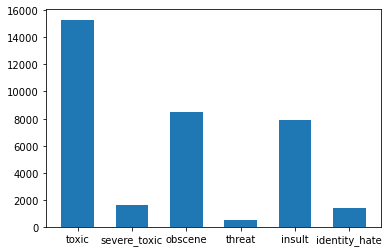

In [23]:
# гистограмма откликов
comments = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
category_list = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
comments_count = [train_df.toxic.sum(), train_df.severe_toxic.sum(), 
         train_df.obscene.sum(), train_df.threat.sum(), 
         train_df.insult.sum(), train_df.identity_hate.sum() ]

plt.bar(comments, comments_count, width=0.6)

<BarContainer object of 2 artists>

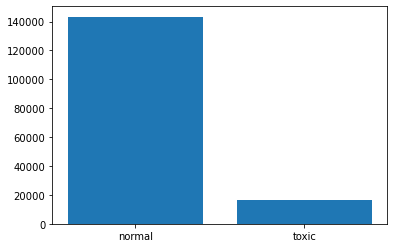

In [24]:
normal_comments = train_df.loc[ 
    (train_df["severe_toxic"]==0)
   &(train_df["toxic"]==0)
   &(train_df["obscene"]==0)
   &(train_df["threat"]==0)
   &(train_df["insult"]==0)
   &(train_df["identity_hate"]==0)
]

toxic_comments = train_df.loc[ 
     (train_df["severe_toxic"]!=0)
   | (train_df["toxic"]!=0)
   | (train_df["obscene"]!=0)
   | (train_df["threat"]!=0)
   | (train_df["insult"]!=0)
   | (train_df["identity_hate"]!=0)
]

plt.bar(['normal', 'toxic'], [len(normal_comments), len(toxic_comments)])

In [6]:
%%time
# клининг
train_text['comment_text'] = train_text['comment_text'].apply(clean_text)
test_text['comment_text']  = test_text['comment_text'].apply(clean_text)

/home/samstikhin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


CPU times: user 3min 34s, sys: 293 ms, total: 3min 35s
Wall time: 3min 35s


In [14]:
train_df = pd.merge(train_text, train_target)
test_df  = pd.merge(test_text, test_target)

# SLIDE (1) Toxic vectorizer

Теперь наши очищенные коменты преобразуем в `tf-idf` вектора. Причем  будем использовать не просто слова, а биграммы. 
Обучите векторайзер с параметрами `max_features = 5000` и `ngram_range= (2,2)` на текстах их трейна и теста (сконкатенируйте их предварительно) и верните его.

Также вам нужно написать функцию отбора самых важных биграм по датафрейму со значениями tf-idf. Для этого необходимо для каждой биграммы среднее значение в фрейме. Так мы найдем среднюю значимость данной биграммы для наших текстов.

#### Output tfidf_top_features:

|  | feature    | tfidf  |
|--|------------|--------|
|0 | две хочу   | 0.1443 |
|1 | хочу пицца | 0.1443 |

# TASK

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_vec(train_text, test_text):
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

def tfidf_top_features(df, top_n=25):
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

# TESTS

In [18]:
X = pd.DataFrame(columns=['comment_text'], 
                          data = ['я недели две хочу пицца',
                                 'но вся пицца не пицца которую я хочу',
                                 'сделать самой идея хорошая',
                                 'но я не знаю которую пицца я хочу'])

Y = pd.DataFrame(columns=['comment_text'],
                          data = ['есть курс на 6 зет который успеть проставить',
                                  'есть таблица чтобы зет проставить',
                                  'сколько дней чтобы проставить зет с хвостовка',
                                  'есть 6 невыставленных зет с этого курс'])


tfidf_vectorizer_bi = tfidf_vec(X, Y)

X_bi = tfidf_vectorizer_bi.transform(X["comment_text"])
Y_bi = tfidf_vectorizer_bi.transform(Y["comment_text"])



features = np.array(tfidf_vectorizer_bi.get_feature_names())

df = pd.DataFrame(data=X_bi.toarray(), columns=features)

answer = np.array([0.14433757, 0.14433757, 0.14433757, 0.14433757, 0.14433757,
       0.14433757, 0.1118034 , 0.1118034 , 0.1118034 , 0.1118034 ,
       0.1118034 , 0.10206207, 0.10206207, 0.10206207, 0.10206207,
       0.10206207, 0.10206207, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])



assert np.allclose(tfidf_top_features(df)['tfidf'].values, answer, atol=1e-3)

## Real part

In [10]:
%%time
tfidf_vectorizer_bi = tfidf_vec(train_text, test_text)

features = np.array(tfidf_vectorizer_bi.get_feature_names())

train_bigrams = tfidf_vectorizer_bi.transform(train_text["comment_text"])
test_bigrams  = tfidf_vectorizer_bi.transform( test_text["comment_text"])

CPU times: user 46.7 s, sys: 876 ms, total: 47.5 s
Wall time: 47.5 s


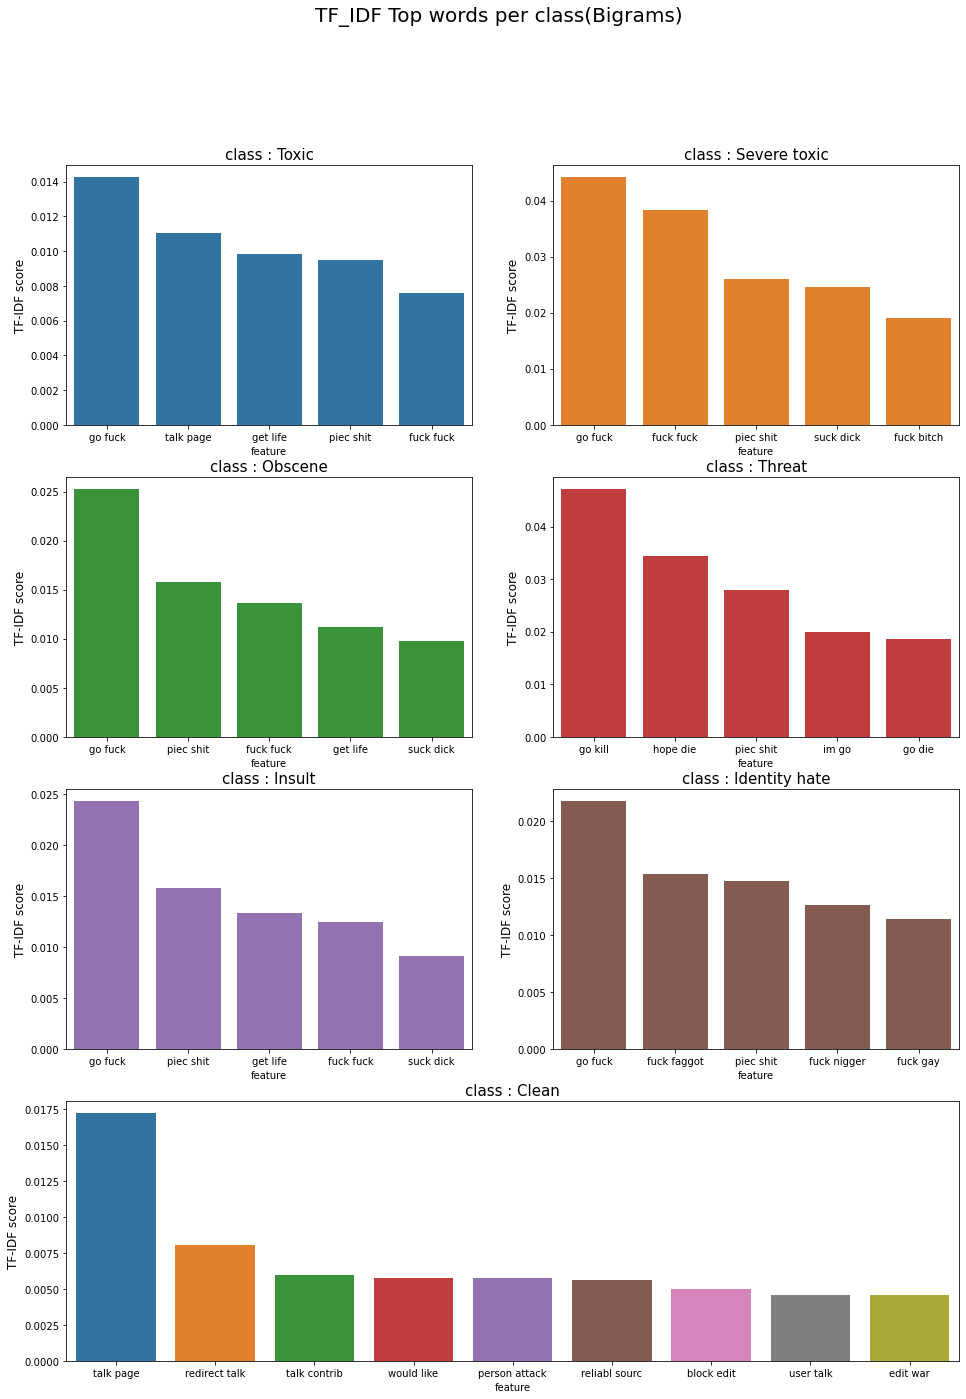

In [11]:
import matplotlib.gridspec as gridspec 
import seaborn as sns
color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')


# создали большую картинку
plt.figure(figsize=(16,22))
plt.suptitle("TF_IDF Top words per class(Bigrams)",fontsize=20)
gridspec.GridSpec(4,2)

# toxic
toxic_bigrams = train_bigrams[train_target.index[train_target['toxic']==1]].toarray()
df = pd.DataFrame(data=toxic_bigrams, columns=features)
top_toxic = tfidf_top_features(df)
plt.subplot2grid((4,2),(0,0))
sns.barplot(top_toxic.feature.iloc[0:5], 
            top_toxic.tfidf.iloc[0:5],
            color=color[0])
plt.title("class : Toxic",fontsize=15)
plt.ylabel('TF-IDF score', fontsize=12)

# 'severe_toxic'
toxic_bigrams = train_bigrams[train_target.index[train_target['severe_toxic']==1]].toarray()
df = pd.DataFrame(data=toxic_bigrams, columns=features)
top_toxic = tfidf_top_features(df)
plt.subplot2grid((4,2),(0,1))
sns.barplot(top_toxic.feature.iloc[0:5],
            top_toxic.tfidf.iloc[0:5],
            color=color[1])
plt.title("class : Severe toxic",fontsize=15)
plt.ylabel('TF-IDF score', fontsize=12)


# threat
toxic_bigrams = train_bigrams[train_target.index[train_target['obscene']==1]].toarray()
df = pd.DataFrame(data=toxic_bigrams, columns=features)
top_toxic = tfidf_top_features(df)
plt.subplot2grid((4,2),(1,0))
sns.barplot(top_toxic.feature.iloc[0:5],
            top_toxic.tfidf.iloc[0:5],
            color=color[2])
plt.title("class : Obscene",fontsize=15)
plt.ylabel('TF-IDF score', fontsize=12)


# obscene
toxic_bigrams = train_bigrams[train_target.index[train_target['threat']==1]].toarray()
df = pd.DataFrame(data=toxic_bigrams, columns=features)
top_toxic = tfidf_top_features(df)
plt.subplot2grid((4,2),(1,1))
sns.barplot(top_toxic.feature.iloc[0:5],
            top_toxic.tfidf.iloc[0:5],
            color=color[3])
plt.title("class : Threat",fontsize=15)
plt.ylabel('TF-IDF score', fontsize=12)


# obscene
toxic_bigrams = train_bigrams[train_target.index[train_target['insult']==1]].toarray()
df = pd.DataFrame(data=toxic_bigrams, columns=features)
top_toxic = tfidf_top_features(df)
plt.subplot2grid((4,2),(2,0))
sns.barplot(top_toxic.feature.iloc[0:5],
            top_toxic.tfidf.iloc[0:5],
            color=color[4])
plt.title("class : Insult",fontsize=15)
plt.ylabel('TF-IDF score', fontsize=12)


# obscene
toxic_bigrams = train_bigrams[train_target.index[train_target['identity_hate']==1]].toarray()
df = pd.DataFrame(data=toxic_bigrams, columns=features)
top_toxic = tfidf_top_features(df)
plt.subplot2grid((4,2),(2,1))
sns.barplot(top_toxic.feature.iloc[0:5],
            top_toxic.tfidf.iloc[0:5],
            color=color[5])
plt.title("class : Identity hate",fontsize=15)
plt.ylabel('TF-IDF score', fontsize=12)


# normal
normal_mask = (train_target["severe_toxic"]==0) \
             &(train_target["toxic"]==0) \
             &(train_target["obscene"]==0) \
             &(train_target["threat"]==0) \
             &(train_target["insult"]==0) \
             &(train_target["identity_hate"]==0)

toxic_bigrams = train_bigrams[train_target.index[normal_mask]].toarray()
df = pd.DataFrame(data=toxic_bigrams, columns=features)
top_toxic = tfidf_top_features(df)
plt.subplot2grid((4,2),(3,0),colspan=2)
sns.barplot(top_toxic.feature.iloc[0:9], 
            top_toxic.tfidf.iloc[0:9])
plt.title("class : Clean",fontsize=15)
plt.ylabel('TF-IDF score', fontsize=12)

plt.show()

# SLIDE (2) Toxic undersampling

После преобразования в `tf-idf`, казалось бы, осталось просто обучить любую простую модель и готово. Однако в этой задаче есть еще один подвох.

Как вы могли заметить соотношение нормальных сообщений к токсичным составляет примерно 10:1. А если брать подклассы `identity_hate` или `threat`, то там соотношение с нормальными комментами будет достигать 100 к 1. В последнем случае модель, которая говорит, что **все сообщения нетоксичные**, будет давать **99% accuracy**! 

В данном случае нужно смотреть на соотношение между `precision` и `recall`. Здесь возможны 2 крайности:

* Закрыли только **самые злые комменты**, а ,большую часть упустили. В этом случае `precision` будет $100%$, но будет крайне маленький `recall`.

* Закрыли все подозрительное, что даже захватили хорошие комменты. В этом случае `recall` будет $100%$, но будет крайне маленький `precision`. 

Чтобы избежать обеих крайностей будем стараться максимизировать `f1-score` - [комбинацию](https://en.wikipedia.org/wiki/F-score) `precision` и `recall`.

Однако, если запустить обычное обучение, мы с большой вероятностью скатимся один из краевых вариантов. Как же этого избежать?

Есть 2 [известные техники](https://habr.com/ru/post/461285/) балансировки выборок: `undersampling` и `oversampling`. Проще всего их понять по [картинке](https://github.com/samstikhin/ml2021/blob/master/09-NLP/images/sampling.png).

<img src="images/sampling.png" width=600 />

* Undersampling. Случайно собираем маленькую выборку из класса с большим числом элементов.
* Oversampling. Собираем большую выборку из класса с малым количеством элементов, путем копирования этих элементов.

Ваша задача реализовать oversampling и добиться приемлимого`f1-score` для каждого класса. 

Вы можете реализовать oversampling сами или можете воспользоваться библиотекой [imblearn](https://imbalanced-learn.org/stable/over_sampling.html#a-practical-guide)

Чтобы добиться результата, можно создать не две одинаковые выборки, а выборки в некоторой пропорции например 1 к 4. В `imblearn` надо поиграться с параметром `sampling_strategy`. 

# TASK

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

def simple_sample(X, y):
    return (X, y)
    
def over_sample(X,y):
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

def apply_model(model, X, y, splits, sample_func):
    
    kfold = #StratifiedKFold
    accuracy, precision, recall, f1 = [], [], [], []
    
    for train, test in kfold.split(X, y):
        
        X_smote, y_smote = sample_func(train, test)
        
        y_pred = # model learning and prediction
        
        #logging accuracy, precision, recall, f1
        
    result = {
        "accuracy":  np.mean(accuracy),
        "precision": np.mean(precision),
        "recall":    np.mean(recall),
        "f1_score":  np.mean(f1)
    }        
  
    return result

# Tests

In [21]:
from sklearn.linear_model import LogisticRegression
import scipy

X_bigrams_test = scipy.sparse.load_npz('data/oversample_test_bigrams.npz')
y_test = pd.read_csv('data/oversample_test_labels.csv')

lr_model = LogisticRegression(C=0.1, solver='sag')

label  = 'toxic'
model_metrics = apply_model(lr_model, X_bigrams_test, y_test[label], 
                            splits=3, sample_func=over_sample)
assert model_metrics['f1_score'] > 0.25

label  = 'severe_toxic'
model_metrics = apply_model(lr_model, X_bigrams_test, y_test[label], 
                            splits=3, sample_func=over_sample)
assert model_metrics['f1_score'] > 0.3

label  = 'obscene'
model_metrics = apply_model(lr_model, X_bigrams_test, y_test[label], 
                            splits=3, sample_func=over_sample)
assert model_metrics['f1_score'] > 0.3

label  = 'threat'
model_metrics = apply_model(lr_model, X_bigrams_test, y_test[label], 
                            splits=3, sample_func=over_sample)
assert model_metrics['f1_score'] > 0.1

label  = 'insult'
model_metrics = apply_model(lr_model, X_bigrams_test, y_test[label], 
                            splits=3, sample_func=over_sample)
assert model_metrics['f1_score'] > 0.3

label  = 'identity_hate'
model_metrics = apply_model(lr_model, X_bigrams_test, y_test[label], 
                            splits=3, sample_func=over_sample)
assert model_metrics['f1_score'] > 0.1

## real life

In [67]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.1, solver='sag')
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

print("~~~~~~~~~~~~ Logistic Regression ~~~~~~~~~~~~")
for class_name in labels:
    y = train_target[class_name]
    print("------RESULT FOR  {0}---------".format(class_name))
    model_metrics = apply_model(lr_model, train_bigrams, y, splits=3, sample_func=simple_sample)
    print('Accuracy:  %.2f%%' % (model_metrics['accuracy']*100))
    print('Precision: %.2f%%' % (model_metrics['precision']*100))
    print('Recall:    %.2f%%' % (model_metrics['recall']*100))
    print('F1-score:  %.2f%%' % (model_metrics['f1_score']*100))

~~~~~~~~~~~~ Logistic Regression ~~~~~~~~~~~~
------RESULT FOR  toxic---------
Accuracy:  90.94%
Precision: 95.71%
Recall:    5.68%
F1-score:  10.72%
------RESULT FOR  severe_toxic---------
Accuracy:  99.00%
Precision: 100.00%
Recall:    0.00%
F1-score:  0.00%
------RESULT FOR  obscene---------
Accuracy:  95.01%
Precision: 97.08%
Recall:    5.91%
F1-score:  11.13%
------RESULT FOR  threat---------
Accuracy:  99.70%
Precision: 100.00%
Recall:    0.00%
F1-score:  0.00%
------RESULT FOR  insult---------
Accuracy:  95.25%
Precision: 89.18%
Recall:    4.30%
F1-score:  8.21%
------RESULT FOR  identity_hate---------
Accuracy:  99.12%
Precision: 100.00%
Recall:    0.00%
F1-score:  0.00%


In [68]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.1, solver='sag')
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

print("~~~~~~~~~~~~ Logistic Regression ~~~~~~~~~~~~")
for class_name in labels:
    y = train_target[class_name]
    print("------RESULT FOR  {0}---------".format(class_name))
    model_metrics = apply_model(lr_model, train_bigrams, y, splits=3, sample_func=over_sample)
    print('Accuracy:  %.2f%%' % (model_metrics['accuracy']*100))
    print('Precision: %.2f%%' % (model_metrics['precision']*100))
    print('Recall:    %.2f%%' % (model_metrics['recall']*100))
    print('F1-score:  %.2f%%' % (model_metrics['f1_score']*100))

~~~~~~~~~~~~ Logistic Regression ~~~~~~~~~~~~
------RESULT FOR  toxic---------
Accuracy:  91.24%
Precision: 59.97%
Recall:    25.84%
F1-score:  36.11%
------RESULT FOR  severe_toxic---------
Accuracy:  97.99%
Precision: 24.97%
Recall:    50.16%
F1-score:  33.31%
------RESULT FOR  obscene---------
Accuracy:  95.23%
Precision: 59.11%
Recall:    32.30%
F1-score:  41.75%
------RESULT FOR  threat---------
Accuracy:  97.91%
Precision: 5.36%
Recall:    35.98%
F1-score:  9.33%
------RESULT FOR  insult---------
Accuracy:  95.10%
Precision: 50.65%
Recall:    32.41%
F1-score:  39.52%
------RESULT FOR  identity_hate---------
Accuracy:  97.06%
Precision: 9.95%
Recall:    29.04%
F1-score:  14.82%


# SLIDE (1) Toxic Token

Мы получили решение через классическое машинное обучение, теперь давайте получим решение через нейронки. 

Для этого для начала нам нужно:

* Получить словарь токенов (упорядочен по алфавиту, 0-ой токен `PAD`, 1-ый токен `UNK`). Токены, которые **меньше чем** `min_count` выбрасывайте из словаря. Заменим потом их на `UNK`.

* Преобразовать коммент в строку токенов, а также заполнить нулями, чтобы получить вектор длины `max_len`. Если коммент очень длинный, возьмите первые `max_len` токенов, а остальные отбросьте (их крайне мало). Словам, которых нет в словаре сопоставляем значение $1$ (id токена `UNK`). 

* Сделать датасет, который будем использовать для создания dataloader.


# TASK

In [ ]:
from torch.utils.data import Dataset

def tokenization(texts, min_count):
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    return tokens, token_to_id

def pad_and_tok_comment(comment, token_to_id, max_len):
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    return 

class LabelDataset(Dataset):
    def __init__(self, dataframe, label):
        self.df = dataframe
        self.label = label
        
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        self.tokens =      ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        self.token_to_id = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        self.max_len =     ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        return ## padded_tokenized_comment, y_label

# TEST

In [26]:
texts =  ['я недели две хочу пицца',
          'но вся пицца не пицца которую я хочу',
          'сделать две самой идея хорошая',
          'но я не знаю которую пицца я хочу',
          'есть курс на 6 зет который успеть проставить',
          'есть таблица чтобы зет проставить',
          'сколько дней чтобы проставить зет с две хвостовка',
          'есть 6 невыставленных зет с этого курс']

tokens, token_to_id = tokenization(texts, min_count=3)



assert tokens == ['PAD', 'UNK', 'две', 'есть', 'зет', 'пицца', 'проставить', 'хочу', 'я']
assert token_to_id['PAD'] == 0
assert token_to_id['UNK'] == 1

max_len = 8

assert np.allclose(pad_and_tok_comment('я недели две хочу пицца', token_to_id, max_len), 
                   np.array([8, 1, 2, 7, 5, 0, 0, 0]))

assert np.allclose(pad_and_tok_comment('я недели две хочу пицца', token_to_id, max_len=4), 
                   np.array([8, 1, 2, 7]))



df = pd.DataFrame({'comment_text': texts, 
                   'pizza': [1, 1, 1, 1, 0, 0, 0, 0],
                   'zet' : [0, 0, 0, 0, 1, 1, 1, 1]})

pizza_dataset = LabelDataset(df, 'pizza', token_to_id, max_len)
zet_dataset = LabelDataset(df, 'zet', token_to_id, max_len)

assert np.allclose(pizza_dataset[0][0], np.array([8, 1, 2, 7, 5, 0, 0, 0]))
assert pizza_dataset[0][1] == 1
assert np.allclose(pizza_dataset[6][0], np.array([1, 1, 1, 6, 4, 1, 2, 1]))
assert pizza_dataset[6][1] == 0
assert np.allclose(zet_dataset[3][0], np.array([1, 8, 1, 1, 1, 5, 8, 7]))
assert zet_dataset[3][1] == 0
assert np.allclose(zet_dataset[6][0], np.array([1, 1, 1, 6, 4, 1, 2, 1]))
assert zet_dataset[6][1] == 1


## real life

In [209]:
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

train_df = pd.merge(train_text, train_target)
test_df  = pd.merge(test_text, test_target)

train, val = train_test_split(train_df, test_size=0.2, 
                               stratify=train_df['toxic'])

min_count = 10
tokens, token_to_id = tokenization(train_text['comment_text'].values.tolist(), min_count=10)

max_len = 500

dataloaders = {'train' : DataLoader(LabelDataset(train, 'toxic',token_to_id, max_len), 
                              batch_size=32, 
                              shuffle=False),
              'val' :    DataLoader(LabelDataset(val, 'toxic', token_to_id, max_len), 
                              batch_size=32, 
                              shuffle=False),
              'test' :   DataLoader(LabelDataset(test, 'toxic', token_to_id, max_len), 
                              batch_size=32, 
                              shuffle=False),      
              }

# SLIDE (1) Toxic network

Теперь нам нужно подготовить нейронку, которая будет обучать эмбеддинги и превращать наши ветора из id токенов в ветор длины 2 - вероятности `нетоксичного` и `токсичного` класса. (Для упрощения задачи обучим нейронку только для одного класса, для остальных классов - задача по желанию).

Для нейронки будем использовать класс `TextModel`. Класса `sequential` недостаточно, так как мы после использование эмбеддингов хотим усреднить вектора слов одного предложения. (Однако вы можете создать свой модуль усредния наследуясь от `nn.Module`, опять же на ваш вкус)

Осталось только написать еще метрику, которую будем использовать. Как мы уже выяснили ранее использовать `Accuracy` в текущей задаче нельзя. Поэтому напишем свой F1_score (да, да, торч ущербный и в нем нет встроенного f1score). 

# TASK

In [ ]:
from torch import nn

class TextModel(nn.Module): #
    def __init__(self, vocab_size, embed_dim=64):
        super(TextModel, self).__init__()
        
        self.embedding = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ      
        self.linear    = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ 
        

    def forward(self, text):  #text: batch_size x max_len  
        return # создать эмбеддинги из текстов, усреднить, схлопнуть в вектор длины 2 черех линейный слой
    
    
class F1_score(nn.Module):
    def __init__(self):
        super(F1_score, self).__init__()

    def forward(self, y_pred, y_true):
        tp = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ 
        tn = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ 
        fp = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ 
        fn = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ 

        epsilon = 1e-7

        precision = tp / (tp + fp + epsilon)
        recall = tp / (tp + fn + epsilon)

        f1 = ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ 
        return f1

# TESTS

In [28]:
import torch

model = TextModel(vocab_size=10)

assert model.embedding.num_embeddings == 10
assert model.linear.out_features == 2
assert model.linear.in_features == 64


model.embedding.weight.data.fill_(1)
model.linear.weight.data.fill_(1)
model.linear.bias.data.fill_(1)


a = torch.tensor([[3,6,5,1,0],
                  [9,6,5,2,4]])

assert torch.allclose(model(a), torch.tensor([[65., 65.],
                                              [65., 65.]]), atol=1e-0)

######################################################################3

from sklearn.metrics import f1_score
x = torch.tensor([1,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,1,0,0,0,1,1,1,1,0,1,0,1,0,1])
y = torch.tensor([0,0,1,0,0,1,1,1,1,1,0,1,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0])


assert np.abs(f1_score(x.numpy(), y.numpy()) - F1_score()(x,y).item()) < 1e-3

# SLIDE (1) Toxic learning

Вот и финальная битва. 

Возьмите pipeline из ImageNet. Замените в нем даталоадеры, модель и метрику сравнения. И запускайтесь!

Ваша сеть за 15 эпох должна превысить `F1_score` 0.7. 

После этого остановите модель и посчитайте ответ для первых 300 комментов из тестового сета (`test_text`). 

Результат на этом сете и нужно отправить в форму на юлерне. 

# TASK

In [ ]:
def toxic():
    return y = np.array([### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ])